# Otomobilerin beygir gücü ve ona göre fiyat hesaplanması yapan modeller.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Veri setini yükleyin
data = pd.read_csv(r'C:\Users\realb\Desktop\araç beygir gücü fiyat hesaplaması\mobil_mesin_harga.csv')

# Özellikleri ve hedef değişkeni ayırın
X = data[['KekuatanMesin']]
y = data['Harga']

# Eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Modelleri tanımlayın
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Modelleri eğitin ve değerlendirin
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Hata oranlarını hesaplayın
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Modeli:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R^2: {r2:.2f}")
    print("-" * 40)

Linear Regression Modeli:
  MSE: 4442.55
  RMSE: 66.65
  MAE: 46.79
  R^2: 0.65
----------------------------------------
Ridge Regression Modeli:
  MSE: 4442.57
  RMSE: 66.65
  MAE: 46.79
  R^2: 0.65
----------------------------------------
Lasso Regression Modeli:
  MSE: 4442.76
  RMSE: 66.65
  MAE: 46.79
  R^2: 0.65
----------------------------------------
Decision Tree Modeli:
  MSE: 2529.23
  RMSE: 50.29
  MAE: 30.35
  R^2: 0.80
----------------------------------------
Random Forest Modeli:
  MSE: 2307.78
  RMSE: 48.04
  MAE: 28.22
  R^2: 0.82
----------------------------------------
Gradient Boosting Modeli:
  MSE: 2623.94
  RMSE: 51.22
  MAE: 31.55
  R^2: 0.79
----------------------------------------
Support Vector Regressor Modeli:
  MSE: 5899.78
  RMSE: 76.81
  MAE: 47.93
  R^2: 0.53
----------------------------------------
K-Nearest Neighbors Modeli:
  MSE: 3116.53
  RMSE: 55.83
  MAE: 35.69
  R^2: 0.75
----------------------------------------


C:\Users\realb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


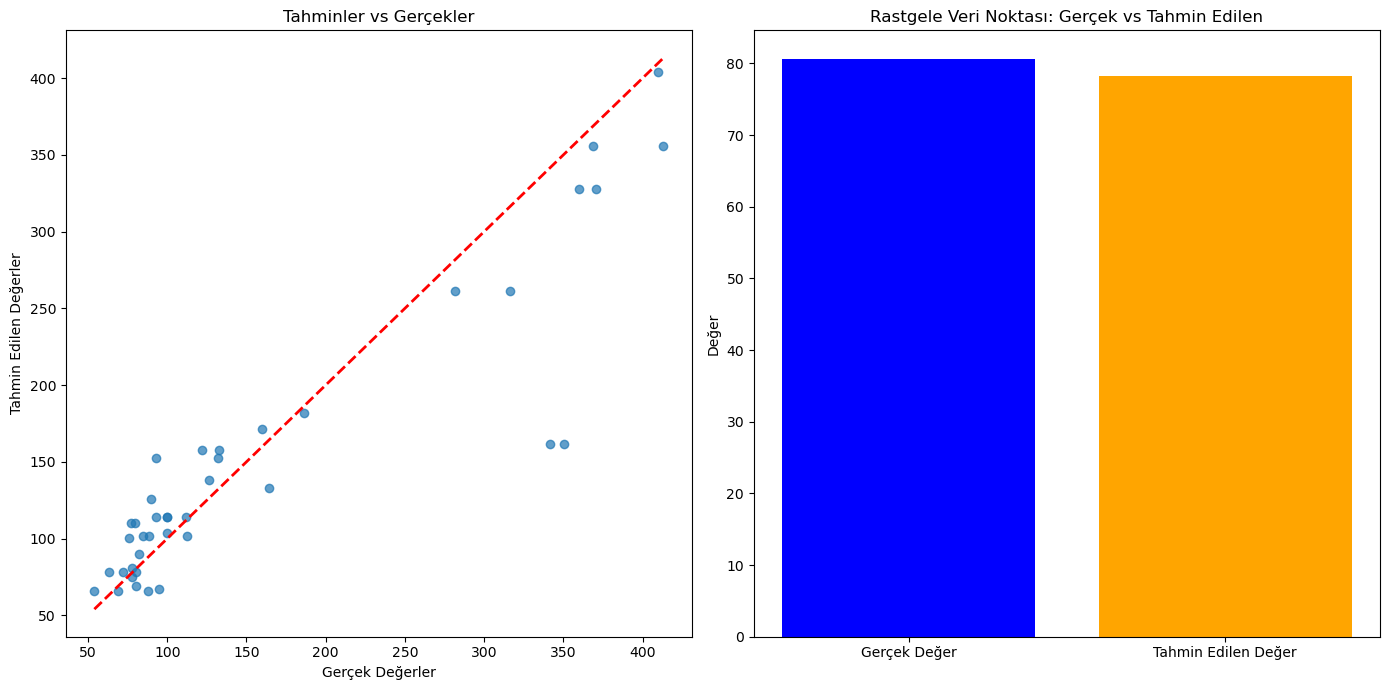

In [6]:
# Random Forest modelini yükleyin (önceden eğitilmiş olmalı)
from sklearn.ensemble import RandomForestRegressor

# Modeli yeniden eğitin veya kaydedilmiş modelinizi yükleyin
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminleri yapın
y_pred = model.predict(X_test)

# Sonuçları görselleştirin
plt.figure(figsize=(14, 7))

# Tahminler ve gerçek değerler scatter plot'u
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Tahminler vs Gerçekler')

# Rastgele bir veri noktasının tahmini
random_index = np.random.randint(len(X_test))
random_data = X_test.iloc[random_index].values.reshape(1, -1)
real_value = y_test.iloc[random_index]
predicted_value = model.predict(random_data)[0]

plt.subplot(1, 2, 2)
plt.bar(['Gerçek Değer', 'Tahmin Edilen Değer'], [real_value, predicted_value], color=['blue', 'orange'])
plt.ylabel('Değer')
plt.title('Rastgele Veri Noktası: Gerçek vs Tahmin Edilen')

plt.tight_layout()
plt.show()